# Data Analyst Project : Comparison of Renewable Energy in Indonesia with Neighboring and Develop Countries 

### Data preparation 

In [1]:
import pandas as pd 
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from functools import reduce


df1 =  pd.read_csv('01 renewable-share-energy.csv')
df2 =  pd.read_csv('02 modern-renewable-energy-consumption.csv')
df3 =  pd.read_csv('03 modern-renewable-prod.csv')
df4 =  pd.read_csv('04 share-electricity-renewables.csv')
df5 =  pd.read_csv('05 hydropower-consumption.csv')
df6 =  pd.read_csv('06 hydro-share-energy.csv')
df7 =  pd.read_csv('07 share-electricity-hydro.csv')
df8 =  pd.read_csv('08 wind-generation.csv')
df9 =  pd.read_csv('09 cumulative-installed-wind-energy-capacity-gigawatts.csv')
df10 =  pd.read_csv('10 wind-share-energy.csv')
df11 =  pd.read_csv('11 share-electricity-wind.csv')
df12 =  pd.read_csv('12 solar-energy-consumption.csv')
df13 =  pd.read_csv('13 installed-solar-PV-capacity.csv')
df14 =  pd.read_csv('14 solar-share-energy.csv')
df15 =  pd.read_csv('15 share-electricity-solar.csv')
df16 =  pd.read_csv('16 biofuel-production.csv')
df17 =  pd.read_csv('17 installed-geothermal-capacity.csv')


In [2]:
#  Drop  Unecessary column
dataframes_list = [df1,df2,df3,df4,df5,df6,df7,df8,df9,df10,df11,df12,df13,df14,df15,df16,df17]
for dataframe in dataframes_list:
    if "Code" in dataframe.columns:
        dataframe.drop("Code", axis=1, inplace=True)
    else:
        print("The 'Code' column does not exist in the dataframe.")

In [3]:
df = reduce(lambda  left,right: pd.merge(left,right,on=['Entity', 'Year'],
                                            how='outer'), dataframes_list).fillna(0)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8997 entries, 0 to 8996
Data columns (total 25 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Entity                                      8997 non-null   object 
 1   Year                                        8997 non-null   int64  
 2   Renewables (% equivalent primary energy)    8997 non-null   float64
 3   Geo Biomass Other - TWh                     8997 non-null   float64
 4   Solar Generation - TWh                      8997 non-null   float64
 5   Wind Generation - TWh                       8997 non-null   float64
 6   Hydro Generation - TWh                      8997 non-null   float64
 7   Electricity from wind (TWh)_x               8997 non-null   float64
 8   Electricity from hydro (TWh)_x              8997 non-null   float64
 9   Electricity from solar (TWh)_x              8997 non-null   float64
 10  Other renewa

In [4]:
df.columns
    


Index(['Entity', 'Year', 'Renewables (% equivalent primary energy)',
       'Geo Biomass Other - TWh', 'Solar Generation - TWh',
       'Wind Generation - TWh', 'Hydro Generation - TWh',
       'Electricity from wind (TWh)_x', 'Electricity from hydro (TWh)_x',
       'Electricity from solar (TWh)_x',
       'Other renewables including bioenergy (TWh)',
       'Renewables (% electricity)', 'Electricity from hydro (TWh)_y',
       'Hydro (% equivalent primary energy)', 'Hydro (% electricity)',
       'Electricity from wind (TWh)_y', 'Wind Capacity',
       'Wind (% equivalent primary energy)', 'Wind (% electricity)',
       'Electricity from solar (TWh)_y', 'Solar Capacity',
       'Solar (% equivalent primary energy)', 'Solar (% electricity)',
       'Biofuels Production - TWh - Total', 'Geothermal Capacity'],
      dtype='object')

In [5]:
df.drop(['Electricity from hydro (TWh)_y','Electricity from wind (TWh)_y','Electricity from solar (TWh)_y'], axis = 1,  inplace= True)


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8997 entries, 0 to 8996
Data columns (total 22 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Entity                                      8997 non-null   object 
 1   Year                                        8997 non-null   int64  
 2   Renewables (% equivalent primary energy)    8997 non-null   float64
 3   Geo Biomass Other - TWh                     8997 non-null   float64
 4   Solar Generation - TWh                      8997 non-null   float64
 5   Wind Generation - TWh                       8997 non-null   float64
 6   Hydro Generation - TWh                      8997 non-null   float64
 7   Electricity from wind (TWh)_x               8997 non-null   float64
 8   Electricity from hydro (TWh)_x              8997 non-null   float64
 9   Electricity from solar (TWh)_x              8997 non-null   float64
 10  Other renewa

In [7]:
df.describe()

,Year,Renewables (% equivalent primary energy),Geo Biomass Other - TWh,Solar Generation - TWh,Wind Generation - TWh,Hydro Generation - TWh,Electricity from wind (TWh)_x,Electricity from hydro (TWh)_x,Electricity from solar (TWh)_x,Other renewables including bioenergy (TWh),...,Hydro (% equivalent primary energy),Hydro (% electricity),Wind Capacity,Wind (% equivalent primary energy),Wind (% electricity),Solar Capacity,Solar (% equivalent primary energy),Solar (% electricity),Biofuels Production - TWh - Total,Geothermal Capacity
count,8997.000000,8997.000000,8997.000000,8997.000000,8997.000000,8997.000000,8997.000000,8997.000000,8997.000000,8997.000000,...,8997.000000,8997.000000,8997.000000,8997.000000,8997.000000,8997.000000,8997.000000,8997.000000,8997.000000,8997.000000
mean,2000.006558,6.685727,8.174756,3.315148,9.094915,92.102214,14.051264,114.544180,5.093739,11.742093,...,5.805308,19.706213,3.392966,0.266737,1.037419,2.274589,0.078465,0.443326,6.793814,77.505104
std,15.680165,11.449514,37.711544,31.142106,66.319393,316.142284,84.875936,357.399416,39.404742,47.419105,...,10.454989,28.237139,27.399124,1.212177,3.926109,23.969711,0.374916,1.773236,51.313206,620.264101
min,1965.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1989.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.050000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2004.000000,1.081630,0.000000,0.000000,0.000000,0.506000,0.000000,3.280000,0.000000,0.010000,...,0.537172,5.645161,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2013.000000,7.878894,0.652208,0.000000,0.002000,19.751514,0.040000,28.270000,0.010000,1.424000,...,6.626581,27.229160,0.000000,0.000305,0.053220,0.000000,0.000000,0.007597,0.000000,0.000000
max,2022.000000,86.874535,762.782650,1032.501200,1861.939800,4345.990000,1848.260000,4340.610000,1040.500000,761.930050,...,72.310486,100.000010,824.874060,24.614344,56.839542,843.086060,5.999280,40.000000,1114.488300,14075.000000


### Data Visualization :Renewable Energy Sources in Indonesia's Electricity Generation through out the year


In [8]:
from_year = 1965
till_year = 2022
Indo_df = df[(df['Entity']== 'Indonesia') & (df['Year']>= from_year) & (df['Year']<= till_year)]
Indo_df.head(10)

,Entity,Year,Renewables (% equivalent primary energy),Geo Biomass Other - TWh,Solar Generation - TWh,Wind Generation - TWh,Hydro Generation - TWh,Electricity from wind (TWh)_x,Electricity from hydro (TWh)_x,Electricity from solar (TWh)_x,...,Hydro (% equivalent primary energy),Hydro (% electricity),Wind Capacity,Wind (% equivalent primary energy),Wind (% electricity),Solar Capacity,Solar (% equivalent primary energy),Solar (% electricity),Biofuels Production - TWh - Total,Geothermal Capacity
3750,Indonesia,1965,6.385928,0.0,0.0,0.0,1.825212,0.0,1.825212,0.0,...,6.385928,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3751,Indonesia,1966,8.364608,0.0,0.0,0.0,2.373218,0.0,2.373218,0.0,...,8.364608,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3752,Indonesia,1967,9.505835,0.0,0.0,0.0,2.664898,0.0,2.664898,0.0,...,9.505835,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3753,Indonesia,1968,11.010139,0.0,0.0,0.0,3.292453,0.0,3.292453,0.0,...,11.010139,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3754,Indonesia,1969,10.201886,0.0,0.0,0.0,3.442712,0.0,3.442712,0.0,...,10.201886,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3755,Indonesia,1970,11.570672,0.0,0.0,0.0,4.185172,0.0,4.185172,0.0,...,11.570672,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3756,Indonesia,1971,4.001150,0.0,0.0,0.0,1.378853,0.0,1.378853,0.0,...,4.001150,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3757,Indonesia,1972,3.373836,0.0,0.0,0.0,1.233013,0.0,1.233013,0.0,...,3.373836,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3758,Indonesia,1973,3.774380,0.0,0.0,0.0,1.555629,0.0,1.555629,0.0,...,3.774380,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3759,Indonesia,1974,3.902294,0.0,0.0,0.0,1.723566,0.0,1.723566,0.0,...,3.902294,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
electricity_percent = ['Renewables (% electricity)','Solar (% electricity)','Wind (% electricity)', 'Hydro (% electricity)']

def plot_timeseries(df):    
    fig,axes = plt.subplots(2, 2, figsize=(18, 10))

    sns.lineplot(ax=axes[0, 0], data=Indo_df, x="Year", y=electricity_percent[0]).set(title = 'Percentage of Electricity Obtained from Renewable source of Energy')
    plt.close()
    sns.lineplot(ax=axes[0, 1], data=Indo_df, x="Year", y=electricity_percent[1]).set(title = 'Percentage of Electricity Obtained from Solar Energy')
    plt.close()
    sns.lineplot(ax=axes[1, 0], data=Indo_df, x="Year", y=electricity_percent[2]).set(title = 'Percentage of Electricity Obtained from Wind Energy')
    plt.close()
    sns.lineplot(ax=axes[1, 1], data=Indo_df, x="Year", y=electricity_percent[3]).set(title = 'Percentage of Electricity Obtained from Hydro Energy')
    plt.close()
    
    return fig

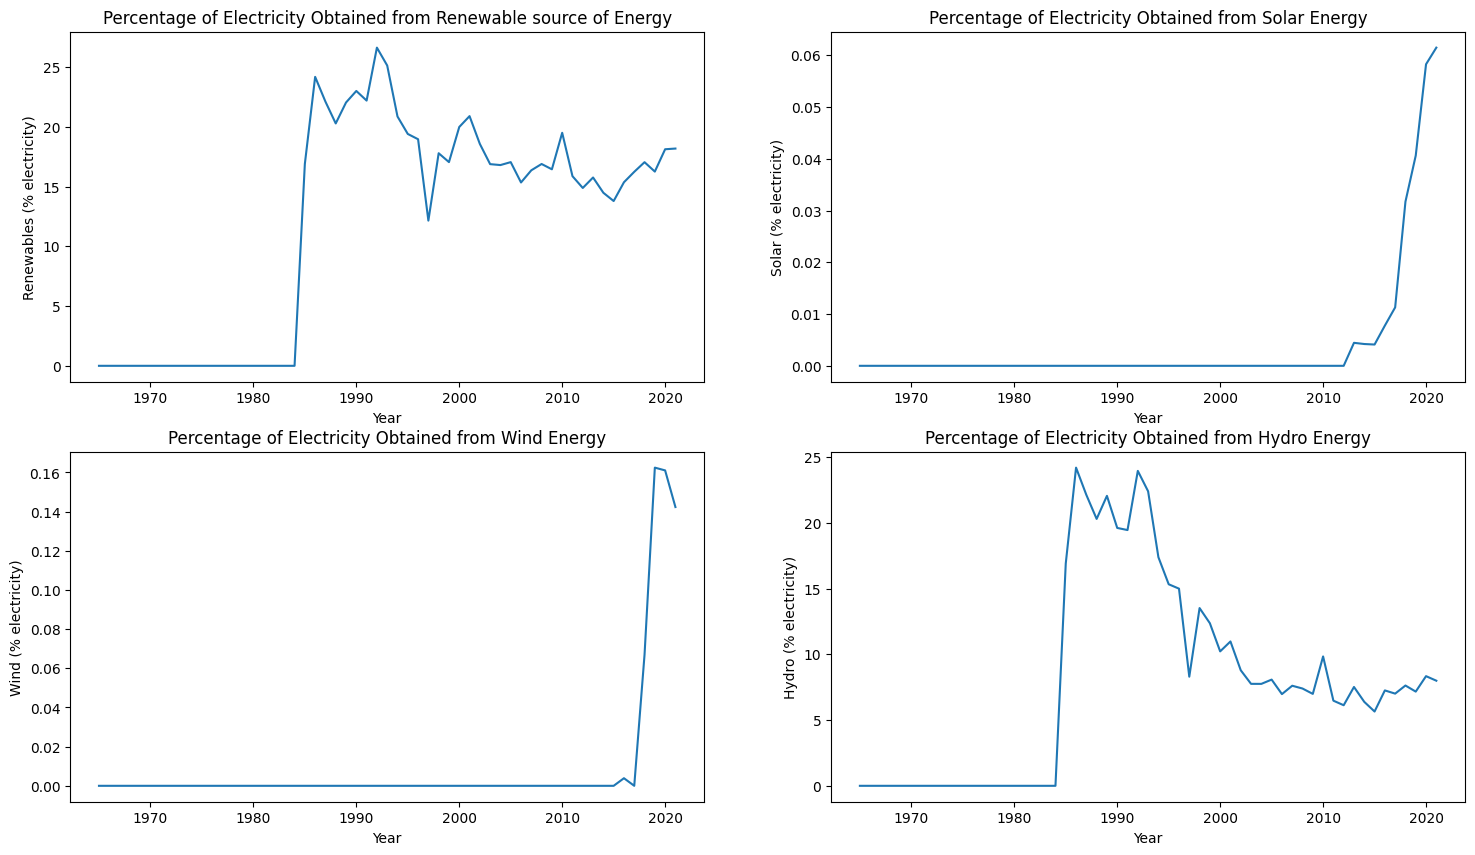

In [10]:
plot_timeseries(Indo_df)

### Distribution of Renewable Energy Sources in Indonesia's Electricity Generation in Recent Year

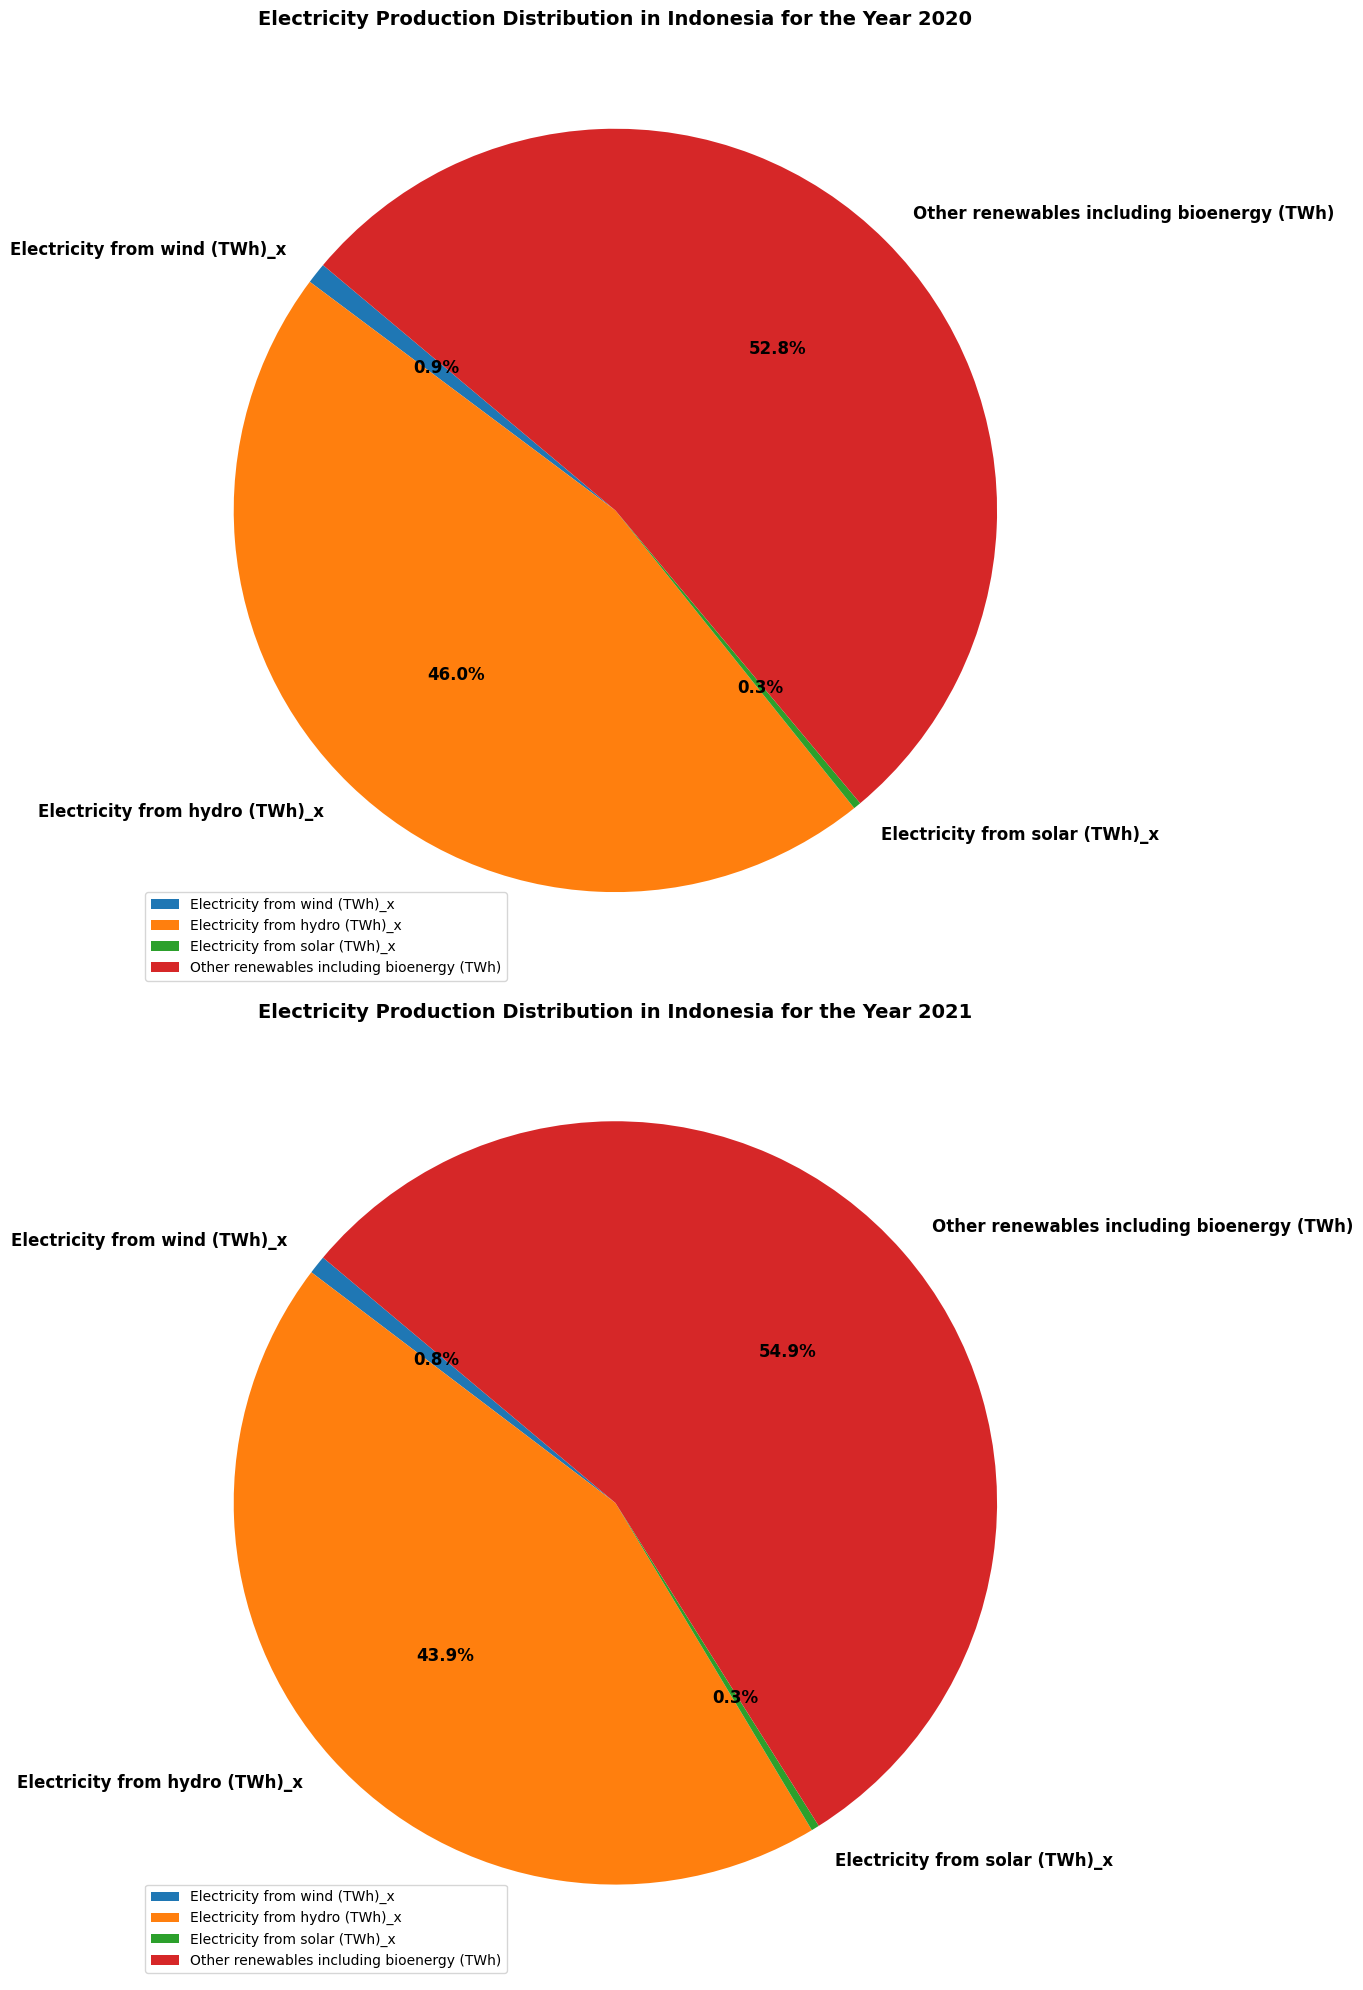

In [43]:
sources = ['Electricity from wind (TWh)_x', 'Electricity from hydro (TWh)_x', 'Electricity from solar (TWh)_x', 'Other renewables including bioenergy (TWh)']

Indo_data = df[df['Entity'] == 'Indonesia']



years = [2020, 2021]

plt.figure(figsize=(20, 20))
for i, year in enumerate(years):
    data_year = Indo_data[Indo_data['Year'] == year]
    energy_production = data_year[sources].values[0]
    plt.subplot(2, 1, i+1)
    patches, texts, autotexts = plt.pie(energy_production, labels=sources, autopct='%1.1f%%', startangle=140)
    
    for text in texts:
        text.set_fontsize(12)
        text.set_weight('bold')
    for autotext in autotexts:
        autotext.set_fontsize(12)
        autotext.set_weight('bold')
    plt.legend(loc = 'lower left')
    plt.title(f'Electricity Production Distribution in Indonesia for the Year {year}', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

### Comparison Renewable Energy Indonesia to Neighboring Country

In [11]:

df['Total Renewable(Twh)'] = df[['Other renewables including bioenergy (TWh)','Electricity from solar (TWh)_x', 
    'Electricity from hydro (TWh)_x', 'Electricity from wind (TWh)_x'  ]].sum(axis =1 )


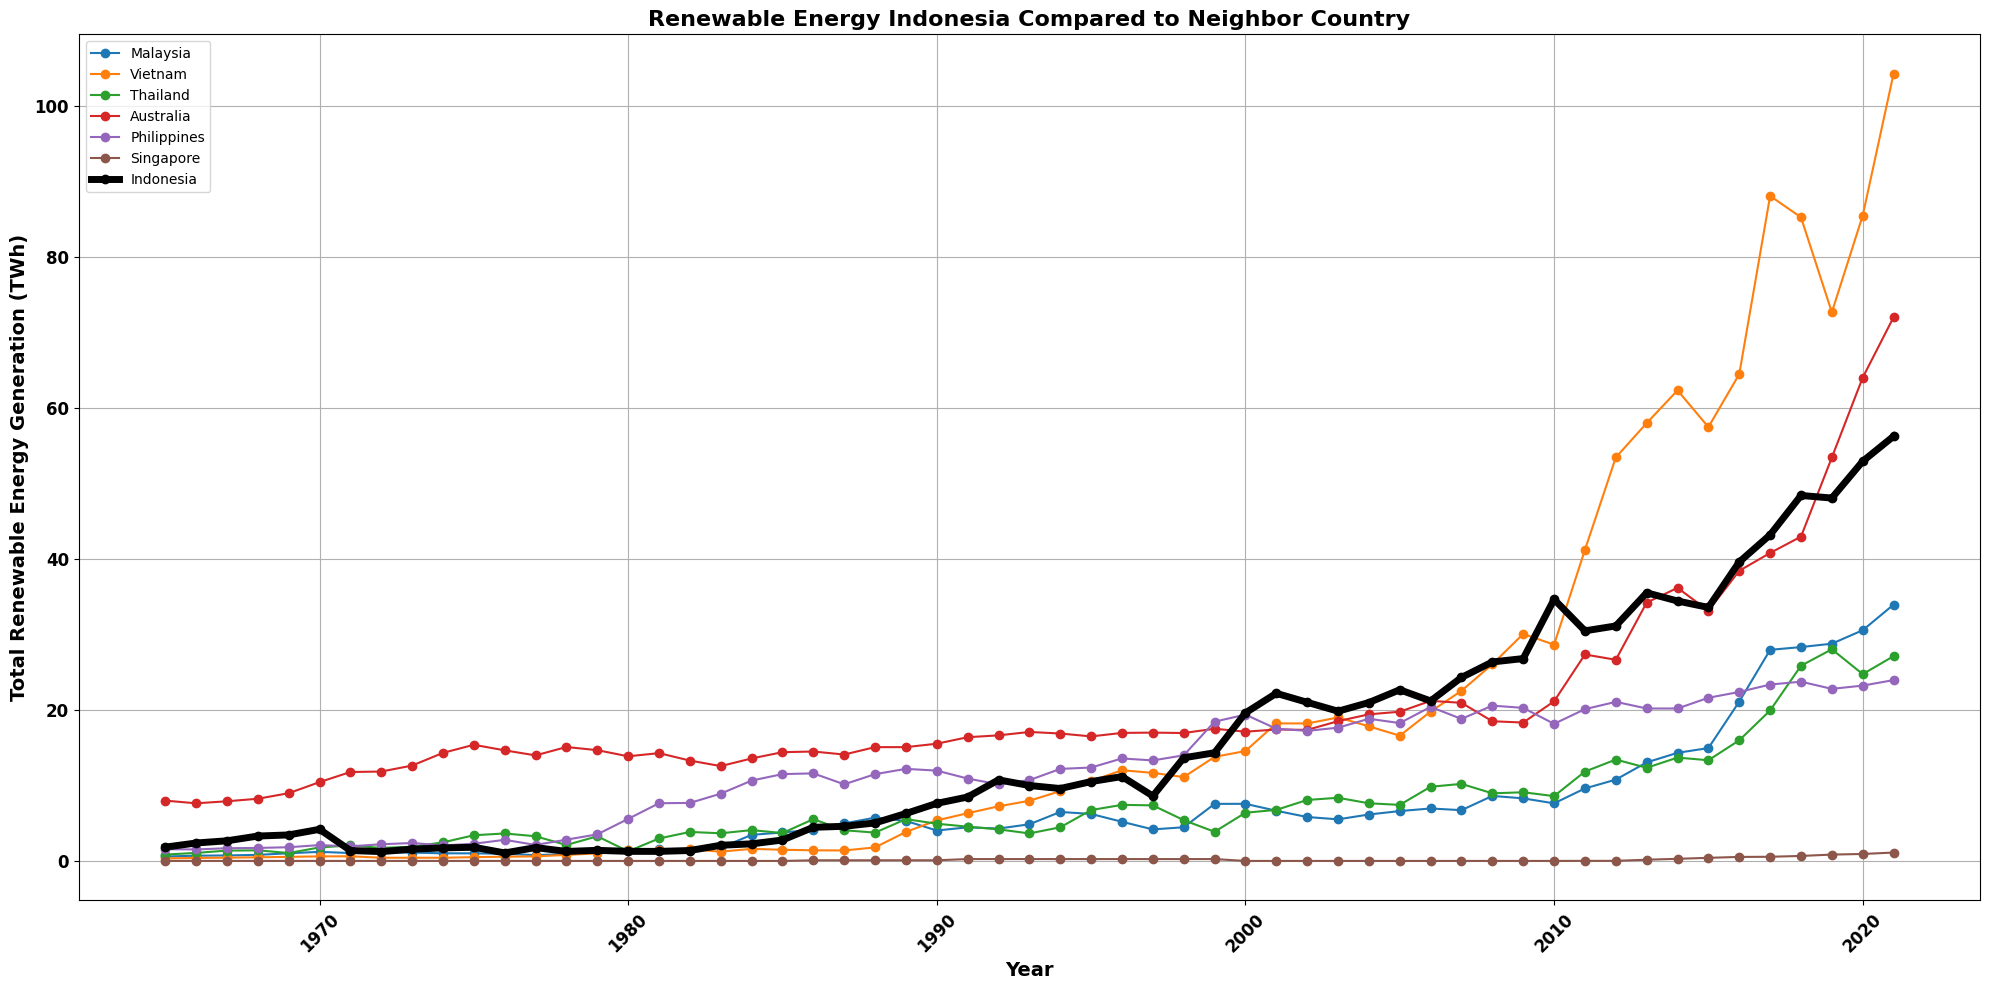

In [22]:

neighbor_countries = [ 'Malaysia','Vietnam','Thailand', 'Australia','Philippines', 'Singapore']

develop_countries_data= df[df['Entity'].isin(neighbor_countries)]

plt.figure(figsize=(20, 10))

for country in neighbor_countries:
    country_data = develop_countries_data[develop_countries_data['Entity'] == country]
    plt.plot(country_data['Year'], country_data['Total Renewable(Twh)'], label=country, marker='o')

indo_data = df[df['Entity']== 'Indonesia']
plt.plot(indo_data['Year'], indo_data['Total Renewable(Twh)'], label = 'Indonesia', marker = 'o', linewidth =5, color = 'black')

plt.title('Renewable Energy Indonesia Compared to Neighbor Country', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=14, fontweight='bold')
plt.ylabel('Total Renewable Energy Generation (TWh)', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.xticks(fontsize=12, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')
plt.tight_layout()
plt.show()

### Renewable Energy Indonesia to Develop Country

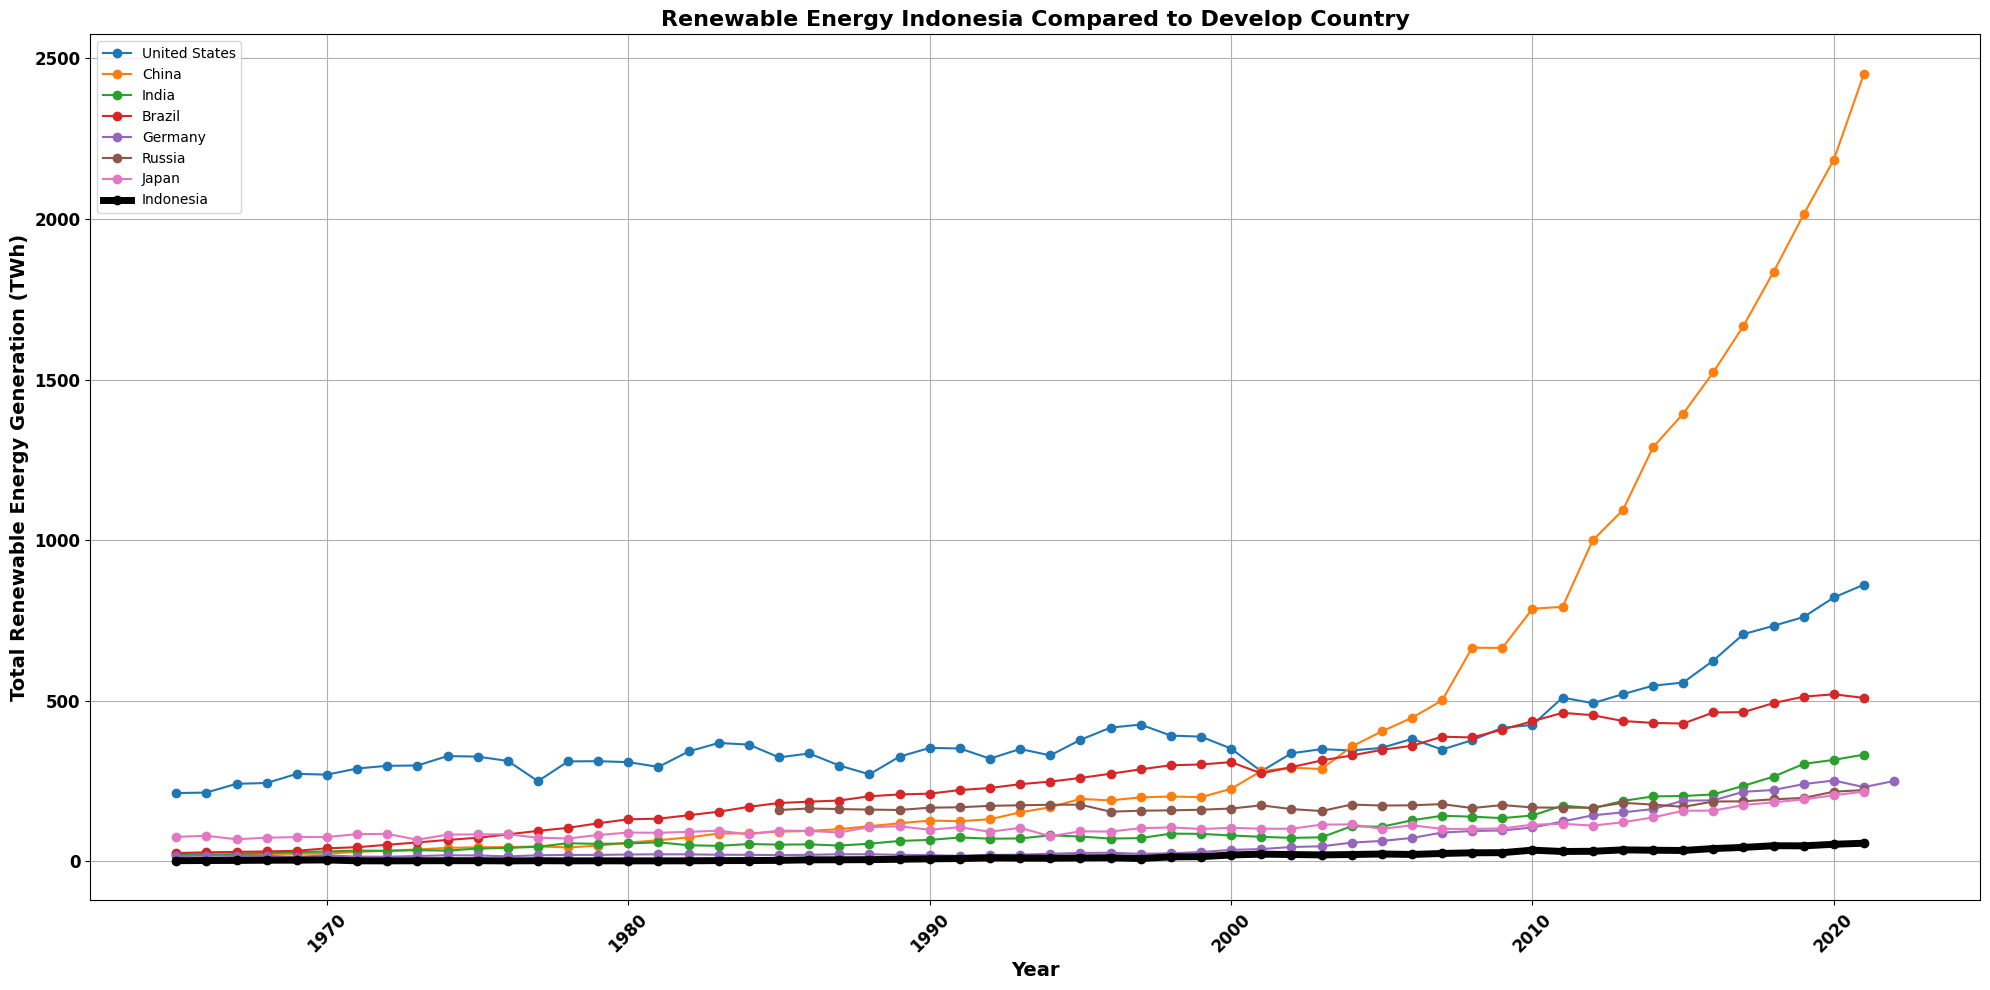

In [27]:
develop_countries = [ 'United States', 'China', 'India', 'Brazil', 'Germany', 'Russia', 'Japan']

develop_countries_data= df[df['Entity'].isin(develop_countries)]

plt.figure(figsize=(20, 10))

for country in develop_countries:
    country_data = develop_countries_data[develop_countries_data['Entity'] == country]
    plt.plot(country_data['Year'], country_data['Total Renewable(Twh)'], label=country, marker='o')

indo_data = df[df['Entity']== 'Indonesia']
plt.plot(indo_data['Year'], indo_data['Total Renewable(Twh)'], label = 'Indonesia', marker = 'o', linewidth =5, color = 'black')

plt.title('Renewable Energy Indonesia Compared to Develop Country', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=14, fontweight='bold')
plt.ylabel('Total Renewable Energy Generation (TWh)', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.xticks(fontsize=12, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')
plt.tight_layout()
plt.show()

### Comparison of Indonesia's renewable energy with neighboring countries in 2021

In [25]:
selected_year = 2021
develop_countries = ['Indonesia','Malaysia','Vietnam','Thailand', 'Australia','Philippines', 'Singapore']
renewable_sources = ['Electricity from wind (TWh)_x', 'Electricity from hydro (TWh)_x', 'Electricity from solar (TWh)_x', 'Other renewables including bioenergy (TWh)']

filtered_data = df[(df['Year'] == selected_year) & (df['Entity'].isin(develop_countries))]

colors = ['green', 'blue', 'yellow', 'brown']

fig = px.bar(filtered_data, x='Entity', y=renewable_sources,
             title=f'Comparison of Indonesia\'s Electricity Generation with Its Neighboring Countries in {selected_year}',
             labels={'Entity': 'Countries', 'value': 'Electricity Generation (TWh)'},
             color_discrete_sequence=colors)

fig.update_layout(xaxis_tickangle=-45, xaxis_title=None, yaxis_title='Electricity Generation (TWh)',
                  title_font=dict(size=20))

fig.show()

### Comparison of Indonesia's renewable energy with Develop countries in 2021

In [44]:
selected_year = 2021
develop_countries = ['Indonesia','United States', 'China', 'India', 'Brazil', 'Germany', 'Russia', 'Japan']
renewable_sources = ['Electricity from wind (TWh)_x', 'Electricity from hydro (TWh)_x', 'Electricity from solar (TWh)_x', 'Other renewables including bioenergy (TWh)']

filtered_data = df[(df['Year'] == selected_year) & (df['Entity'].isin(develop_countries))]

colors = ['green', 'blue', 'yellow', 'brown']

fig = px.bar(filtered_data, x='Entity', y=renewable_sources,
             title=f'Comparison of Indonesia\'s Electricity Generation with Its Develop Countries in {selected_year}',
             labels={'Entity': 'Countries', 'value': 'Electricity Generation (TWh)'},
             color_discrete_sequence=colors)

fig.update_layout(xaxis_tickangle=-45, xaxis_title=None, yaxis_title='Electricity Generation (TWh)',
                  title_font=dict(size=20))

fig.show()